In [782]:
import cv2 as cv
import numpy as np
from skimage import io
from skimage import util
from skimage.transform import resize

In [783]:
org_image = cv.imread('Images/RoadImages/test5.jpg')
# org_image = cv.cvtColor(org_image, cv.COLOR_BGR2RGB)
org_image = cv.resize(org_image, (1920, 1080))


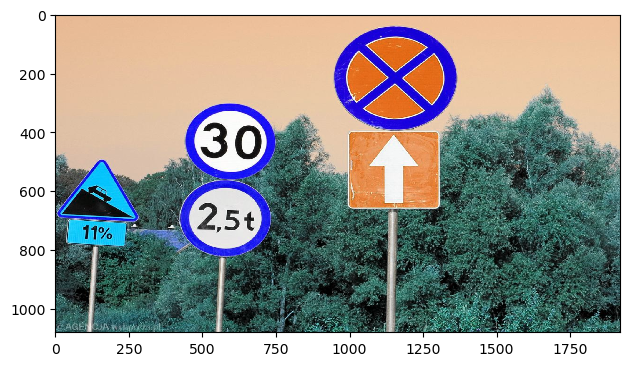

In [784]:
io.imshow(org_image)

In [785]:
from itertools import product

In [786]:
# blue_lower_bounds = (60, 0, 0)
# blue_upper_bounds = (255, 50, 50)
#
# blue_buffed = np.zeros((1080, 1920, 3), dtype=int)
# for x, y in product(range(1080), range(1920)):
#     if org_image[x, y, 0] > org_image[x, y, 1] and org_image[x, y, 0] > org_image[x, y, 2] and (abs(org_image[x, y, 0] - org_image[x, y, 1]) > 15 or abs(org_image[x, y, 0] - org_image[x, y, 2]) > 15):
#         blue_buffed[x, y] = [org_image[x, y, 0] * 2, org_image[x, y, 1] // 2, org_image[x, y, 2] // 2]
#     else:
#         blue_buffed[x, y] = org_image[x, y]


In [787]:
color_buffed = org_image.copy()

In [788]:
blue_test1 = org_image[:, :, 0] > org_image[:, :, 1]
blue_test2 = org_image[:, :, 0] > org_image[:, :, 2]
blue_test3 = abs(org_image[:, :, 0] - org_image[:, :, 1]) > 17
blue_test4 = abs(org_image[:, :, 0] - org_image[:, :, 2]) > 17

In [789]:
color_buffed[blue_test1 & blue_test2 & blue_test3 & blue_test4, 0] = 255

In [790]:
red_test1 = org_image[:, :, 2] > org_image[:, :, 0]
red_test2 = org_image[:, :, 2] > org_image[:, :, 1]
red_test3 = abs(org_image[:, :, 2] - org_image[:, :, 0]) > 20
red_test4 = abs(org_image[:, :, 2] - org_image[:, :, 1]) > 20
red_test5 = abs(org_image[:, :, 0] - org_image[:, :, 1]) < 20

In [791]:
color_buffed[red_test1 & red_test2 & red_test3 & red_test4 & red_test5, 2] = 255

In [793]:
color_buffed = np.clip(color_buffed, 0, 255)
cv.imwrite('xd.jpg', color_buffed)

True

In [794]:
# blue_mask = cv.inRange(org_image, blue_lower_bounds, blue_upper_bounds)
#
# # for x, y, in product(range(1980), range(1920))
#
#
# red_lower_bounds = (0, 0, 50)
# red_upper_bounds = (100, 100, 255)
# red_mask = cv.inRange(org_image, red_lower_bounds, red_upper_bounds)
# # gray = cv.cvtColor(org_image, cv.COLOR_BGR2GRAY)
# # mask_rgb = cv.cvtColor(org_image, cv.COLOR_GRAY2BGR)
# # frame = org_image & mask_rgb
#
# mask = blue_mask | red_mask
# io.imshow(blue_mask)

In [801]:

image = color_buffed.copy()
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image = cv.medianBlur(image,11)
image = cv.normalize(src=image, dst=None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX, dtype=cv.CV_8U)

# ret, image = cv.threshold(image, 127 , 255, cv.THRESH_BINARY)
# image = util.invert(image)

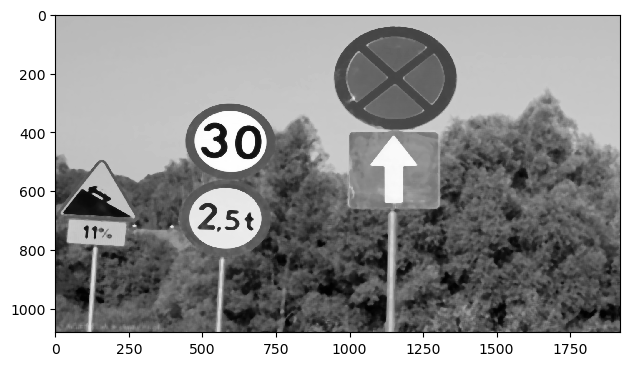

In [802]:
io.imshow(image)

In [818]:
output = org_image.copy()

In [798]:
circles = None
circles = cv.HoughCircles(image, cv.HOUGH_GRADIENT, 1, 100, np.array([]), param1=15,param2=45,minRadius=50,maxRadius=150)
circles.shape[1]

84

In [799]:
counter = 0
if circles is not None: # Check if circles have been found and only then iterate over these and add them to the image
    _a, b, _c = circles.shape
    for i in range(b):
        cv.circle(output, (int(circles[0][i][0]), int(circles[0][i][1])), int(circles[0][i][2]), (0, 255, 0), 3, cv.LINE_AA)  # draw center of circle
        counter += 1

True

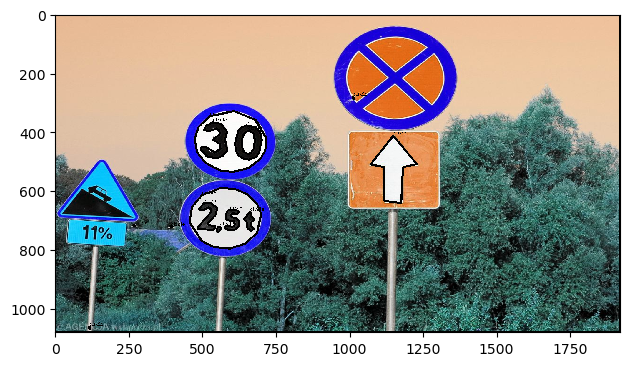

In [827]:
io.imshow(output)
cv.imwrite('xd.jpg', output)

In [828]:
output = org_image.copy()

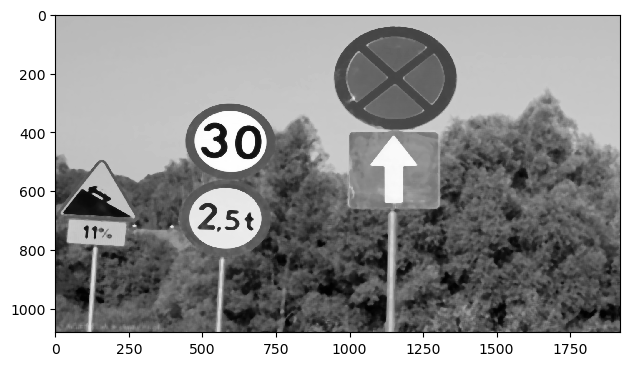

In [833]:
io.imshow(image)

In [831]:
ret, thrash = cv.threshold(image, 175 , 255, cv.CHAIN_APPROX_NONE)
contours , hierarchy = cv.findContours(thrash, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

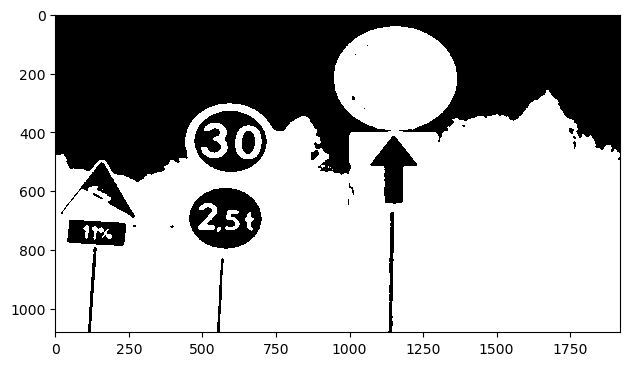

In [832]:
io.imshow(thrash)

In [821]:
for contour in contours:
    approx = cv.approxPolyDP(contour, 0.01* cv.arcLength(contour, True), True)
    cv.drawContours(output, [approx], 0, (0, 0, 0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 5
    if len(approx) == 3:
        cv.putText( output, "Triangle", (x, y), cv.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0) )
    elif len(approx) == 4 :
        x, y , w, h = cv.boundingRect(approx)
        aspectRatio = float(w)/h
        print(aspectRatio)
        if aspectRatio >= 0.95 and aspectRatio < 1.05:
            cv.putText(output, "square", (x, y), cv.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

        else:
            cv.putText(output, "rectangle", (x, y), cv.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

    elif len(approx) == 5 :
        cv.putText(output, "pentagon", (x, y), cv.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 10 :
        cv.putText(output, "star", (x, y), cv.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    else:
        cv.putText(output, "circle", (x, y), cv.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

1.7777777777777777


True

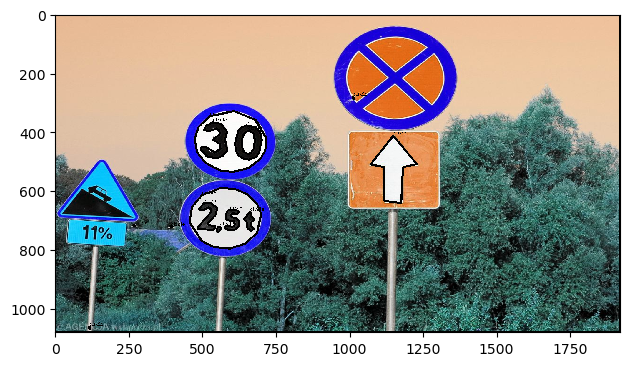

In [822]:
io.imshow(output)
cv.imwrite('xd.jpg', output)